<a href="https://colab.research.google.com/github/marcellosicbaldi/Understaing-CNN/blob/main/understanding_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Visualizing filters of convolutional layers in a pretrained VGG16.

We look at the filter as just weights, and we plot them for each channel

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# load vgg model
from keras.applications.vgg16 import VGG16
# load the model
model = VGG16(weights='imagenet', include_top=True)
# summarize the model
model.summary()

Using TensorFlow backend.


Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
for layer in model.layers:
	# check for convolutional layer
	if 'conv' not in layer.name:
		continue
	# get filter weights
	filters, biases = layer.get_weights()
	print(layer.name, filters.shape)


block1_conv1 (3, 3, 3, 64)
block1_conv2 (3, 3, 64, 64)
block2_conv1 (3, 3, 64, 128)
block2_conv2 (3, 3, 128, 128)
block3_conv1 (3, 3, 128, 256)
block3_conv2 (3, 3, 256, 256)
block3_conv3 (3, 3, 256, 256)
block4_conv1 (3, 3, 256, 512)
block4_conv2 (3, 3, 512, 512)
block4_conv3 (3, 3, 512, 512)
block5_conv1 (3, 3, 512, 512)
block5_conv2 (3, 3, 512, 512)
block5_conv3 (3, 3, 512, 512)


In [ ]:
filters, b = model.layers[1].get_weights()
print(filters.shape) # 64 filters, kernel 3x3x3 (length, width, depth = channels (RGB) )

(3, 3, 3, 64)


I want to visualize what the first convolutional layers sees. I already extracted his weights in the second cell. (notice that the weights are organized in a matrix -> their spatial relation is important and is what allows me to visualize an image).
Moreover, the weights are really close to 0 -> I normalize them between 0 and 1 for better visualization.

We have 64 filters, each of which has dimension 3x3x3. -> We could have 3 plots for each single filter (one for each channel (RGB)). Better: compress all three into a single color image.

The problem is that we then have 63 other filters that we want to visualize.

In [ ]:
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min) # each weight has a value [0-1]

## Plotting the first six filters of Block1_Conv1
I plot each filter as a new row of subplots, and each filter channel as a new column.

-> One row for each filter and one column for each channel

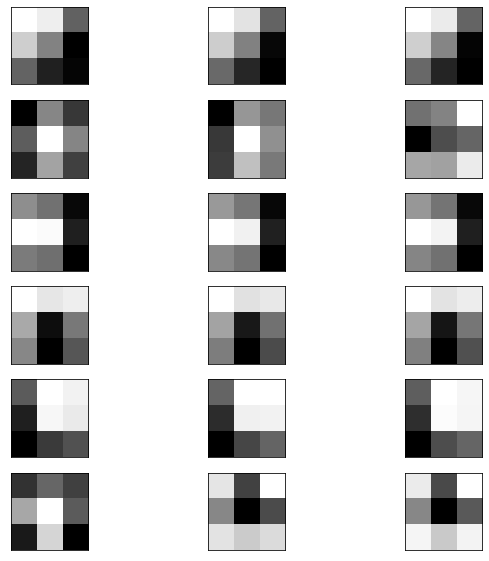

In [ ]:
n = 6
index = 1
plt.figure(figsize = (10,10))
for i in range(n):
  f = filters[:, :, :, i]
  for j in range(filters.shape[2]):
    ax = plt.subplot(n, filters.shape[2], index)
    ax.set_xticks([])
    ax.set_yticks([])   
    plt.imshow(f[:, :, j], cmap = 'gray')
    index += 1
plt.show()

## Visualizing the kind of patterns that activate a specific layer

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
model = VGG16()
for i in range(len(model.layers)):
	layer = model.layers[i]
	# check for convolutional layer
	if 'conv' not in layer.name:
		continue
	# summarize output shape
	print(i, layer.name, layer.output.shape)

1 block1_conv1 (None, 224, 224, 64)
2 block1_conv2 (None, 224, 224, 64)
4 block2_conv1 (None, 112, 112, 128)
5 block2_conv2 (None, 112, 112, 128)
7 block3_conv1 (None, 56, 56, 256)
8 block3_conv2 (None, 56, 56, 256)
9 block3_conv3 (None, 56, 56, 256)
11 block4_conv1 (None, 28, 28, 512)
12 block4_conv2 (None, 28, 28, 512)
13 block4_conv3 (None, 28, 28, 512)
15 block5_conv1 (None, 14, 14, 512)
16 block5_conv2 (None, 14, 14, 512)
17 block5_conv3 (None, 14, 14, 512)


Now I redifined the model in order to have as final output the output of the block1_conv1 layer

In [ ]:
model_2 = Model(inputs=model.inputs, output=model.layers[1].output)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=Tensor("bl...)`
  """Entry point for launching an IPython kernel.


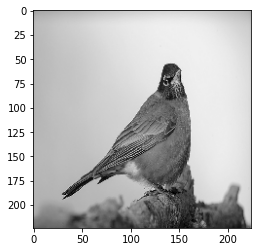

In [ ]:
from PIL import Image
imgg = load_img('bird.jpg', target_size=(224, 224))
img = img_to_array(imgg)
img = np.expand_dims(img, axis = 0)
img = preprocess_input(img)
gray = imgg.convert('LA')
plt.imshow(gray)

In [ ]:
feature_maps = model_2.predict(img)
feature_maps.shape # I get an output of (224x224x64) 
feature_maps[0,:,:,0].shape

(224, 224)

I have as output 64 'images', or more precisely feature maps, of size 224x224. 


I want to plot them all. 


I print them in a 8x8 subplot.

In the next cell I print only the output of the first of the 64 filters

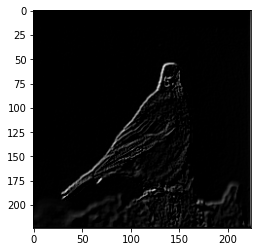

In [ ]:
filter_index = 0 # first of the 64 filters
plt.imshow(feature_maps[0, :, :, 0], cmap = 'gray')

I now print all 64 images (feature maps) (outputs of the 64 filters in the first convolutional layer)

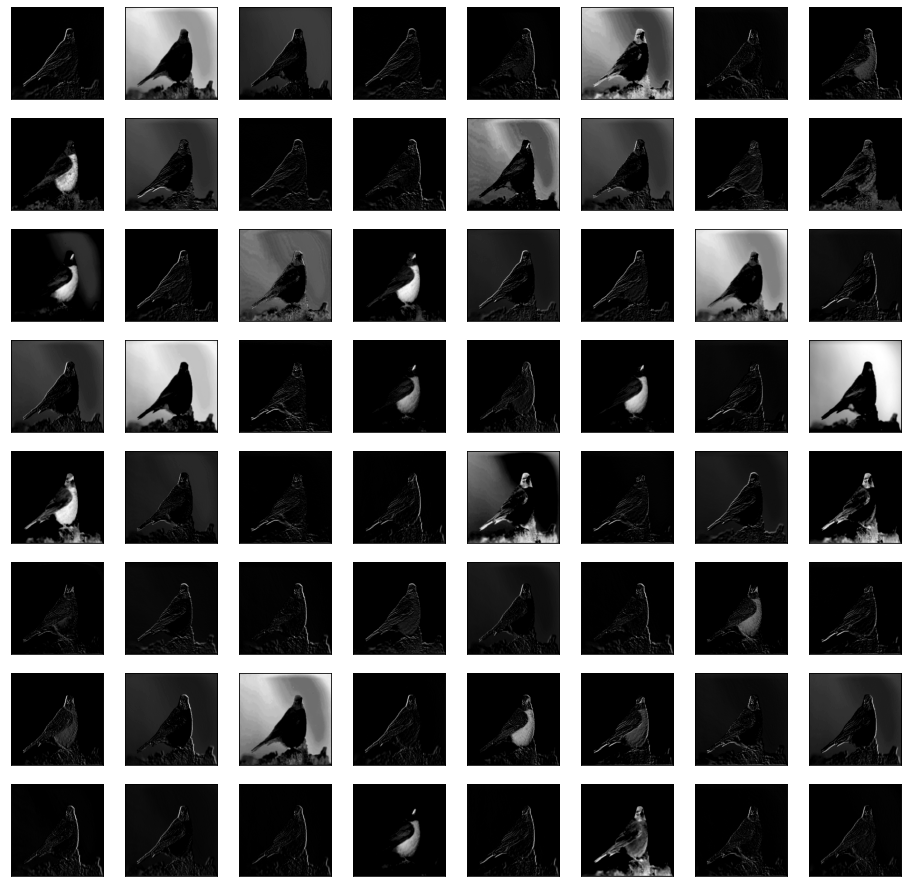

In [ ]:
plt.figure(figsize=(16,16))
square = 8
index = 1
for _ in range(square):
	for _ in range(square):
		# specify subplot and turn of axis
		ax = plt.subplot(square, square, index)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		plt.imshow(feature_maps[0, :, :, index-1], cmap='gray')
		index += 1
# show the figure
plt.show()

### Let's consider now the output of a layer closer to the final output, for example block 4_conv3

In [ ]:
model.layers[13].name

'block4_conv3'

In [ ]:
model_3 = Model(inputs=model.inputs, output=model.layers[13].output)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=Tensor("bl...)`
  """Entry point for launching an IPython kernel.


In [ ]:
feature_maps = model_3.predict(img)
print(feature_maps.shape) # I get an output of (224x224x64) 
feature_maps[0,:,:,0].shape # we can notice that the size of the image has reduced

(1, 28, 28, 512)


(28, 28)

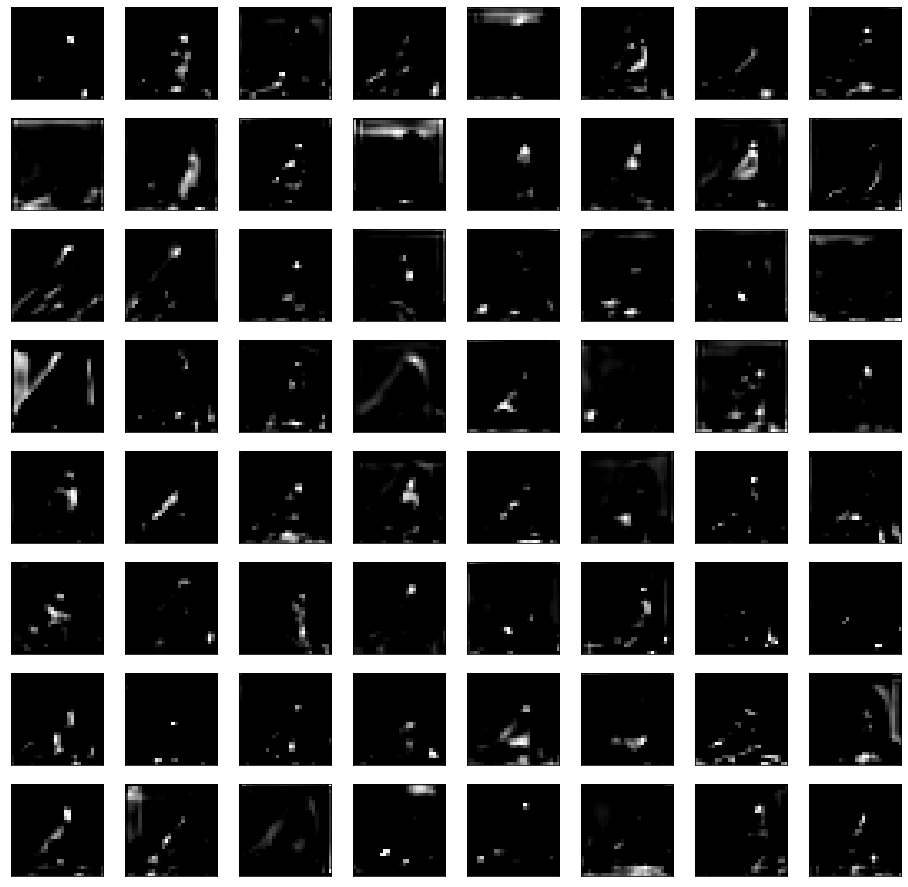

In [ ]:
plt.figure(figsize=(16,16))
square = 8
index = 1
for _ in range(square):
	for _ in range(square):
		# specify subplot and turn of axis
		ax = plt.subplot(square, square, index)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		plt.imshow(feature_maps[0, :, :, index-1], cmap='gray')
		index += 1
# show the figure
plt.show()

Summarizing: feature maps closer to the input of the model capture a lot of fine detail in the image and that as we progress deeper into the model, the feature maps show less and less detail.
This pattern was to be expected, as the model abstracts the features from the image into more general concepts that can be used to make a classification.